In [86]:
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [88]:
heart_data = pd.read_csv('/content/heart.csv')   #csv data to pandas dataframe
heart_data.head()                               #first 5 rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [89]:
heart_data.tail()      #last 5 rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [90]:
#number of rows and columns
heart_data.shape

(303, 14)

In [91]:
heart_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [92]:
#check for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [93]:
#statistical measures about the data
#25% of values are less than 47.5 in age
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [94]:
#checking the distribution of target variable
heart_data['target'].value_counts()
#0--> Healthy heart, 1--> Deffective heart

1    165
0    138
Name: target, dtype: int64

Splitting the Features and Target

In [95]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [96]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print((X.shape, X_train.shape, X_test.shape))

((303, 13), (242, 13), (61, 13))


# Model Training

1.Logistic Regression


In [98]:
# Create the Logistic Regression classifier
model_lr = LogisticRegression()

# Fit the model on the training data
model_lr.fit(X_train, Y_train)

# Accuracy on training data
X_train_prediction_lr = model_lr.predict(X_train)
training_data_accuracy_lr = accuracy_score(X_train_prediction_lr, Y_train)
print('Accuracy on Training data (Logistic Regression): ', training_data_accuracy_lr)

# Accuracy on test data
X_test_prediction_lr = model_lr.predict(X_test)
test_data_accuracy_lr = accuracy_score(X_test_prediction_lr, Y_test)
print('Accuracy on Test data (Logistic Regression): ', test_data_accuracy_lr)

Accuracy on Training data (Logistic Regression):  0.8512396694214877
Accuracy on Test data (Logistic Regression):  0.819672131147541


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2. Decision Tree classifier

In [99]:
# Load your dataset and split into features and labels
your_features_column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
your_target_column_name = 'target'

features = heart_data[your_features_column_names]
labels = heart_data[your_target_column_name]

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Create the Decision Tree classifier with adjusted hyperparameters
tree_model = DecisionTreeClassifier(max_depth=4, min_samples_split=5, min_samples_leaf=2, random_state=42)

# Fit the model on the training data
tree_model.fit(X_train, Y_train)

# Accuracy on training data
X_train_prediction_tree = tree_model.predict(X_train)
training_data_accuracy_tree = accuracy_score(X_train_prediction_tree, Y_train)
print('Accuracy on Training data (Decision Tree):', training_data_accuracy_tree)

# Accuracy on test data
X_test_prediction_tree = tree_model.predict(X_test)
test_data_accuracy_tree = accuracy_score(X_test_prediction_tree, Y_test)
print('Accuracy on Test data (Decision Tree):', test_data_accuracy_tree)


Accuracy on Training data (Decision Tree): 0.8801652892561983
Accuracy on Test data (Decision Tree): 0.8524590163934426


Decision Tree gives better accuracy.
To visualize the tree structure, we use the 'plot_tree' function from scikit-learn

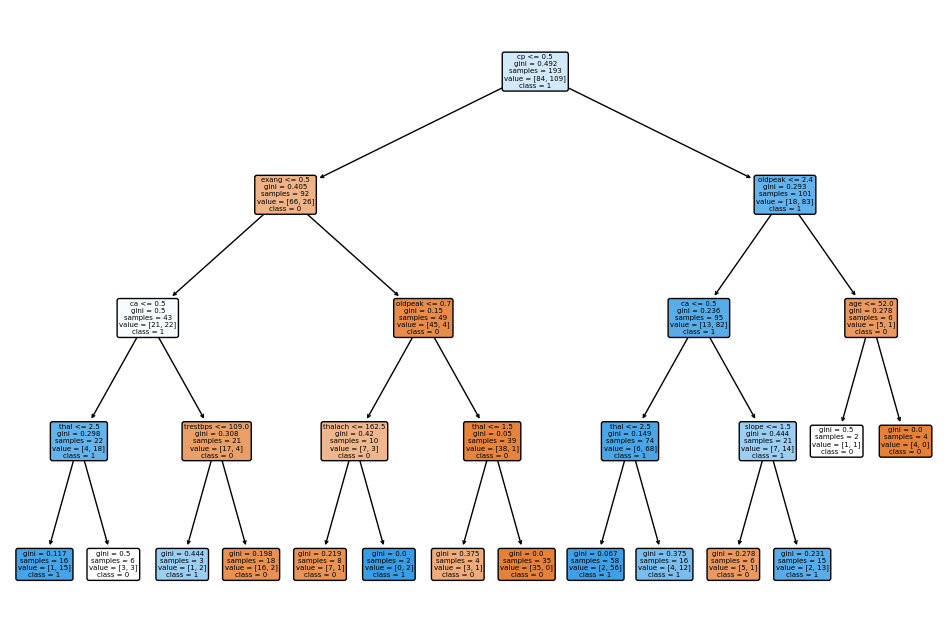

In [102]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create the Decision Tree classifier
tree_model = DecisionTreeClassifier(max_depth=4, min_samples_split=5, min_samples_leaf=2, random_state=42)

# Fit the model on the training data
tree_model.fit(X_train, Y_train)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=your_features_column_names, class_names=['0', '1'], filled=True, rounded=True)
plt.show()


Building a Predictive System (Using Decision Tree Classifier)

In [101]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = tree_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Saving the trained model

In [79]:
import pickle

In [103]:
filename = 'heart_disease_model.sav'
pickle.dump(tree_model, open(filename,'wb'))

In [ ]:
#loading the saved model
loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))

In [ ]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = tree_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
